# Welcome to the ALIAS Demonstration Notebook!
This Ipython Notebook aims to demonstrate the key functionality of the ALIAS library.

First, import the library and create a blank abstract argumentation framework:

In [1]:
import alias as al
example = al.ArgumentationFramework('Example')

Lets add a few arguments to the framework we've called 'Example':

In [2]:
example.add_argument('a')
example.add_argument('b')
example.add_argument('c')
# Arguments can also be passed as a list or tuple
# e.g: example.add_argument(['a','b,'c'])

Now, lets create some attacks between these arguments:

In [3]:
example.add_attack(('a','b'))
example.add_attack(('b','c'))
# Attacks can also be passed as a list or a tuple 
# by using the optional parameter 'atts'
# e.g: example.add_attack(atts=[('a', 'b'), ('b', 'c')])  

We have created an Argumentation Framework called example which contains three arguments and two attacks.  For a string representation of the Framework, simply call print on it:

In [4]:
print example

ArgumentationFramework 'Example' : {'a' : ['b'], 'c' : [], 'b' : ['c']}


Argument objects belonging to a framework can be referenced by name like so:

In [5]:
arga = example['a']
print arga

Argument 'a' : ['b']


ALIAS utilises NetworkX's drawing library to provide visual representations of Argumentation Frameworks.  Lets draw our AF 'example' using the `draw_framework()` function:

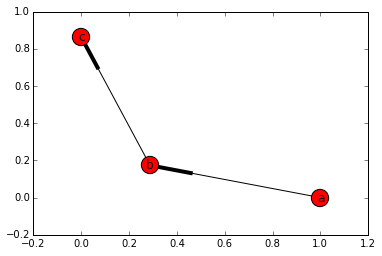

In [6]:
# Creating drawings requires 
# matplotlib and NetworkX (NetworkX is imported by ALIAS internally)
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Call ALIAS' drawing facility on our AF
al.draw_framework(example)

Lets apply a labelling to our AF.  We can use ALIAS' built-in `generate_all_in()` function to generate an "All-In labelling" for our framework.

In [7]:
# Call the generate_all_in() function on the example AF
allin = example.generate_all_in()
print allin
# Labellings are updated dynamically when the AF is updated
example.add_argument('d')
print allin
example.remove_argument('d')
print allin

Labelling 'All-In' : {in : ['a', 'c', 'b'] out : [] undecided : [] undefined : []}
Labelling 'All-In' : {in : ['a', 'c', 'b'] out : [] undecided : [] undefined : ['d']}
Labelling 'All-In' : {in : ['a', 'c', 'b'] out : [] undecided : [] undefined : []}


`draw_framework()` can also take a labelling as an argument to colour code the arguments in the representation:

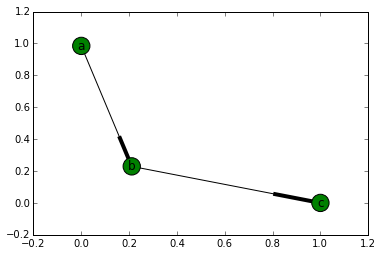

In [8]:
al.draw_framework(example, labelling=allin)

Lets apply some semantics to our AF.  ALIAS can handle both extension-based and labelling-based semantics.